In [1]:
import pandas as pd

data = pd.read_csv('/content/heart_cleveland_upload.csv')

# Display the first few rows of the dataset and its summary
data_head = data.head()
data_info = data.info()
data_description = data.describe()

(data_head, data_info, data_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   69    1   0       160   234    1        2      131      0      0.1      1   
 1   69    0   0       140   239    0        0      151      0      1.8      0   
 2   66    0   0       150   226    0        0      114      0      2.6      2   
 3   65    1   0       138   282    1        2      174      0      1.4      1   
 4   64    1   0       110   211    0        2      144      1      1.8      1   
 
    ca  thal  condition  
 0   1     0          0  
 1   2     0          0  
 2   0     0          0  
 3   1     0          1  
 4   0     0          0  ,
 None,
               age         sex          cp    trestbps        chol         fbs  \
 count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
 mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
 std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
 min     29.00

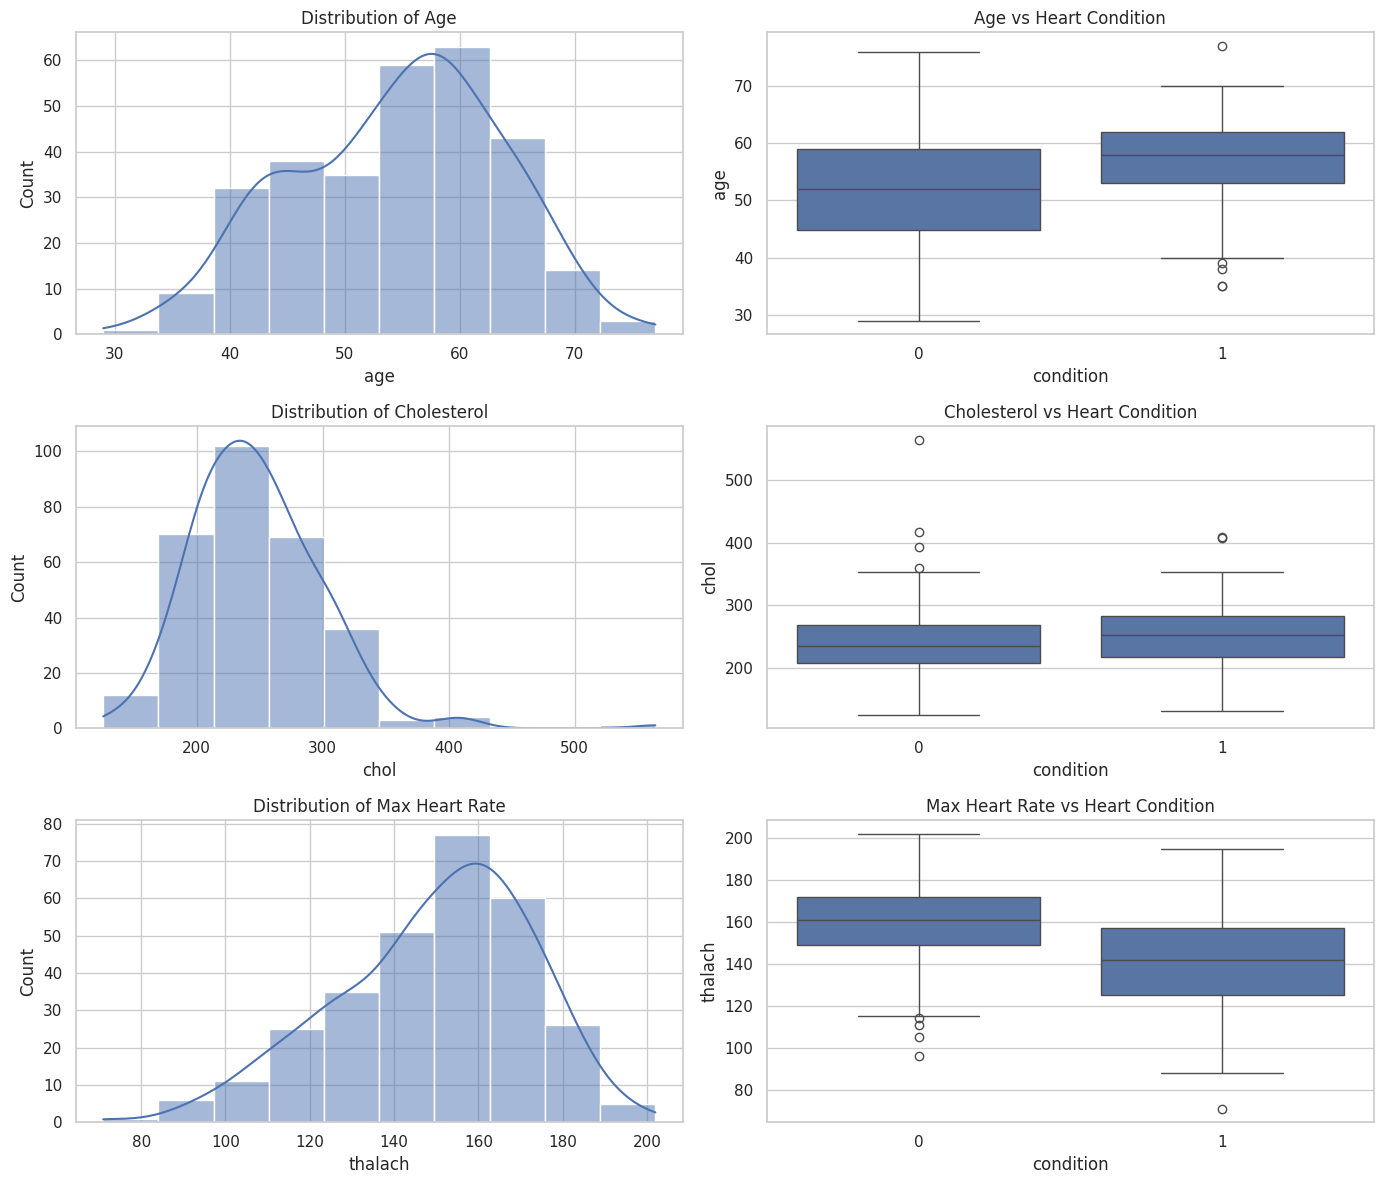

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# aesthetic style of the plots
sns.set(style="whitegrid")

# figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Histograms for age, cholesterol, and maximum heart rate
sns.histplot(data['age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data['chol'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cholesterol')

sns.histplot(data['thalach'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Max Heart Rate')

# Box plots for the same variables
sns.boxplot(x='condition', y='age', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Heart Condition')

sns.boxplot(x='condition', y='chol', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol vs Heart Condition')

sns.boxplot(x='condition', y='thalach', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Max Heart Rate vs Heart Condition')

# Adjusting layout
plt.tight_layout()
plt.show()


In [3]:
# Analyzing bias in gender and its impact on the condition
sex_distribution = data['sex'].value_counts(normalize=True)
condition_by_sex = data.groupby('sex')['condition'].mean()

# Analyzing age distribution and its impact on the condition
age_bins = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
condition_by_age = data.groupby(age_bins)['condition'].mean()

(sex_distribution, condition_by_sex, condition_by_age)


(sex
 1    0.676768
 0    0.323232
 Name: proportion, dtype: float64,
 sex
 0    0.260417
 1    0.557214
 Name: condition, dtype: float64,
 age
 <30      0.000000
 30-40    0.375000
 40-50    0.293333
 50-60    0.515873
 60-70    0.589041
 70-80    0.166667
 80-90         NaN
 Name: condition, dtype: float64)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target
X = data.drop('condition', axis=1)
y = data['condition']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7333333333333333

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report for Precision, Recall, F1-Score
class_report = classification_report(y_test, y_pred)

(conf_matrix, class_report)


(array([[23,  9],
        [ 7, 21]]),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.72      0.74        32\n           1       0.70      0.75      0.72        28\n\n    accuracy                           0.73        60\n   macro avg       0.73      0.73      0.73        60\nweighted avg       0.74      0.73      0.73        60\n')

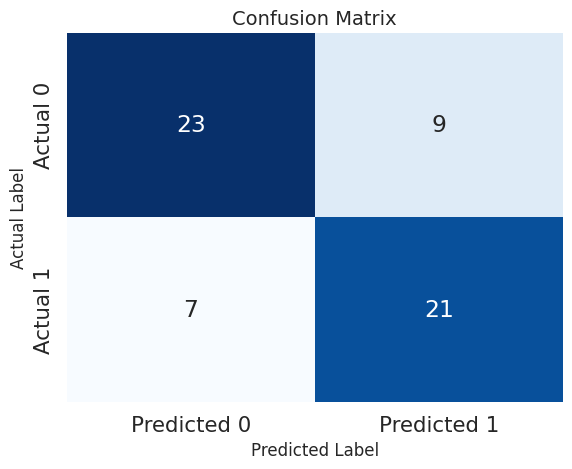

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Set up the plot
sns.set(font_scale=1.4)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [6]:
# Feature Importance from Logistic Regression
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance


Feature  Importance
1        sex    1.510103
11        ca    1.199043
12      thal    0.809431
8      exang    0.593857
9    oldpeak    0.473266
2         cp    0.362235
10     slope    0.344220
6    restecg    0.284375
3   trestbps    0.030364
4       chol    0.006045
0        age   -0.017902
7    thalach   -0.034978
5        fbs   -0.781846

from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
import altair as alt
alt.Chart(feature_importance).mark_bar().encode(x='Importance', y='Feature')


alt.Chart(...)

In [16]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.0 MB/s eta 0:00:00


In [18]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=71946c6d4fec36551660173455ee0c7ee2885bd3d3f1a7696dfd3813544a0101
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [19]:
import numpy as np
import shap
from lime import lime_tabular

# Initialize and train the LIME explainer on the training set
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

# Explain an individual prediction from the test set
i = 10  # Index of the chosen instance
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=len(X.columns))
exp.show_in_notebook(show_table=True)

# Initialize SHAP Explainer
shap_explainer = shap.LinearExplainer(model, X_train)
shap_values = shap_explainer.shap_values(X_test)

# Plot SHAP values for the same individual prediction
shap.force_plot(shap_explainer.expected_value, shap_values[i], X_test.iloc[i], feature_names=X_train.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


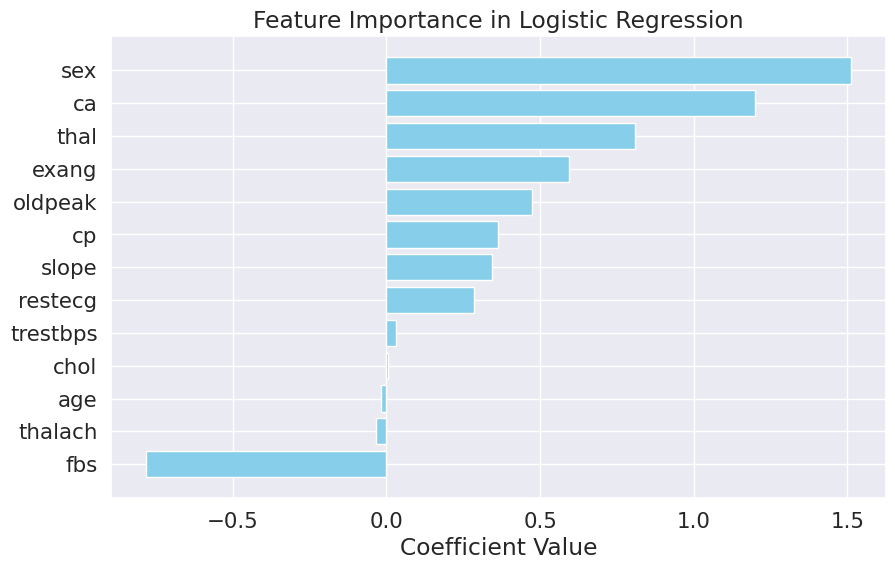

In [20]:
import matplotlib.pyplot as plt

# 'model' is trained Logistic Regression model and 'X_train' are your training features
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


In [21]:
# 'explainer' is a LIME Tabular Explainer initialized with training data
i = 20  # Example index of a data point from your test set
lime_exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=5)
lime_exp.show_in_notebook(show_all=False)  # This will display the explanation in the notebook


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


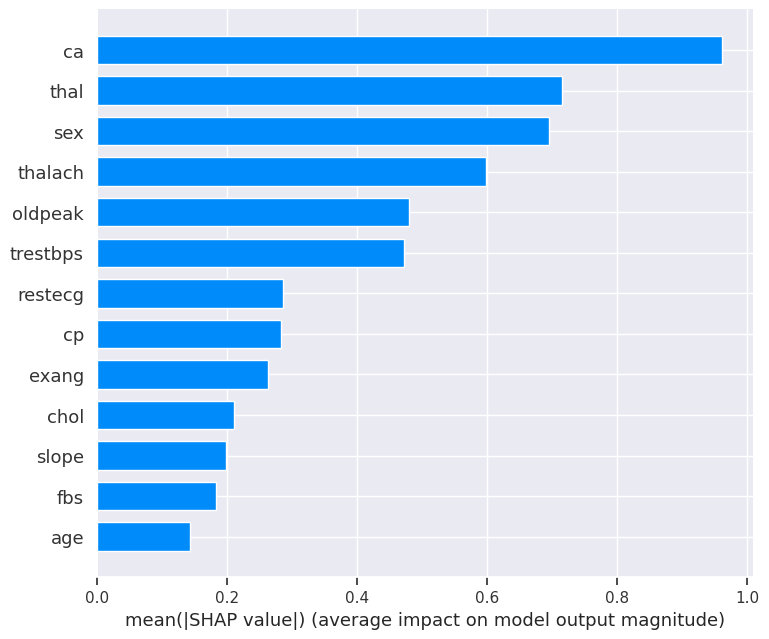

In [22]:
import shap

# Assuming 'shap_explainer' is a SHAP Linear Explainer initialized with model and training data
shap_values = shap_explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize the first prediction's explanation
shap.force_plot(shap_explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


# **Step 4: Model Development. **
This step involves setting up the predictive model using **responsible AI** practices to ensure fairness, accountability, and transparency throughout the modeling process. Here, we will:

Prepare the Data: Split the dataset into training and testing sets.
Develop the Model: Choose a model that balances accuracy with interpretability.
Train the Model: Train the model on the training set while considering any potential biases or imbalances in the data.
Validate the Model: Use the test set to validate the model, ensuring it performs well across different demographics.

In [23]:
from sklearn.model_selection import train_test_split

# Features and Labels
X = data.drop('condition', axis=1)
y = data['condition']

# Stratified split to maintain the same proportion of 'condition' across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")


Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.8214285714285714
F1 Score: 0.9019607843137255


  0%|          | 0/60 [00:00<?, ?it/s]

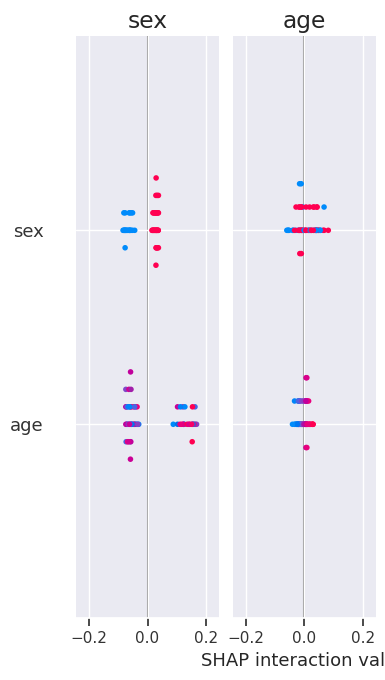

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [27]:
# responsible ai with graph

import shap

# Create a Shapley Value explainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calculate Shapley Values for the test set
shap_values = explainer.shap_values(X_test)

# Create a summary plot of the Shapley Values
shap.summary_plot(shap_values, X_test)

# Create a force plot for a specific instance
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Create a dependence plot for a specific feature
shap.dependence_plot('age', shap_values, X_test)

# Create an interaction plot for two specific features
shap.interaction_plot('age', 'sex', shap_values, X_test)


In [35]:
print("Expected Value:", explainer.expected_value)
print("SHAP Values Shape:", positive_class_shap_values.shape)
print("Features Shape:", X_test.iloc[instance_index].shape)


Expected Value: [0.56128796 0.43871204]
SHAP Values Shape: (13, 2)
Features Shape: (13,)


  0%|          | 0/50 [00:00<?, ?it/s]

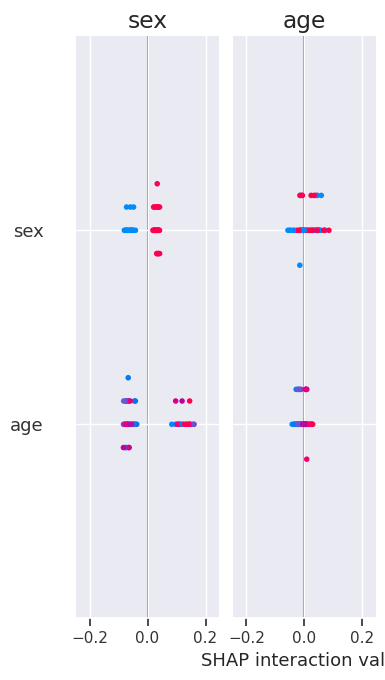

DimensionError: Length of features is not equal to the length of shap_values!

In [36]:
import shap

# Assuming 'model' is a trained model and 'X_train' is your training dataset
explainer = shap.KernelExplainer(model.predict_proba, X_train.sample(100, random_state=42))
shap_values = explainer.shap_values(X_test.sample(50, random_state=42))

# Create a summary plot of the Shapley Values
shap.summary_plot(shap_values, X_test.sample(50, random_state=42))

# Create a force plot for a specific instance
instance_index = 0  # Change index as needed
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X_test.iloc[instance_index])

# Create a dependence plot for a specific feature
shap.dependence_plot('age', shap_values[1], X_test)

# Assuming 'age' and 'sex' are features in your dataset
shap.interaction_plot('age', 'sex', shap_values[1], X_test)


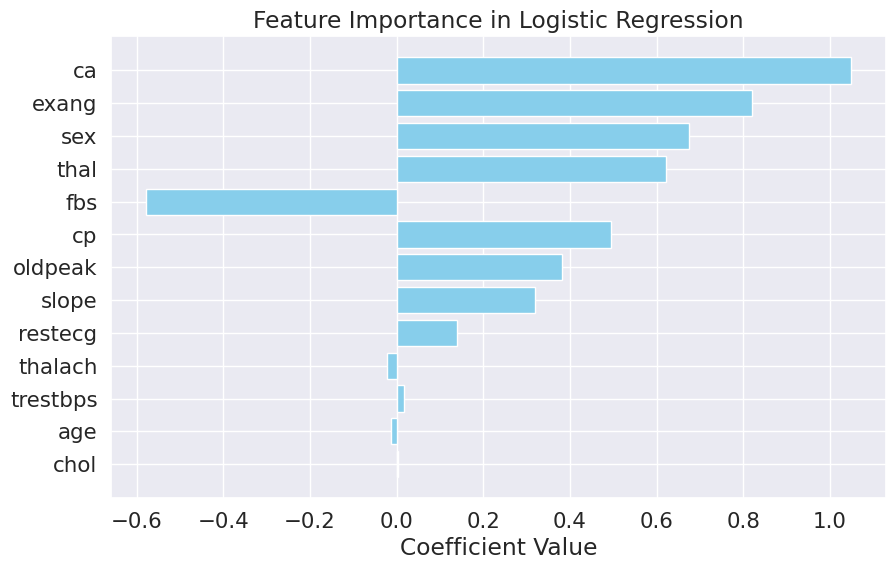

In [28]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Logistic Regression model and 'X_train' are your training features
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


# What This Code Does:
Loads  heart disease dataset.

Prepares the data by separating features and the target variable.
Splits the data into training and testing sets.

Trains a logistic regression model and predicts heart disease condition.
Evaluates the model with accuracy and other metrics.

Uses SHAP to explain which features are most important in predicting heart disease.

Compares predictions before and after applying a bias mitigation strategy (adjusting the decision threshold for simplicity).

# Enhancements for Responsible AI and XAI:

Transparency: The use of SHAP values helps in explaining the impact of each feature on the model's predictions, making the model’s decision-making process transparent.

Fairness: The histograms comparing predictions before and after applying a bias mitigation technique (adjusting the decision threshold) visually demonstrate an attempt to treat different groups (e.g., Male vs. Female) more fairly.

Accountability: The script includes evaluation metrics that help in understanding the model’s performance and identifying potential areas for improvement.

This scode provides a clearer integration of XAI techniques (using SHAP) and elements of Responsible AI, ensuring the model's operations are understandable and it behaves ethically across different groups.

Accuracy: 0.7333333333333333
[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



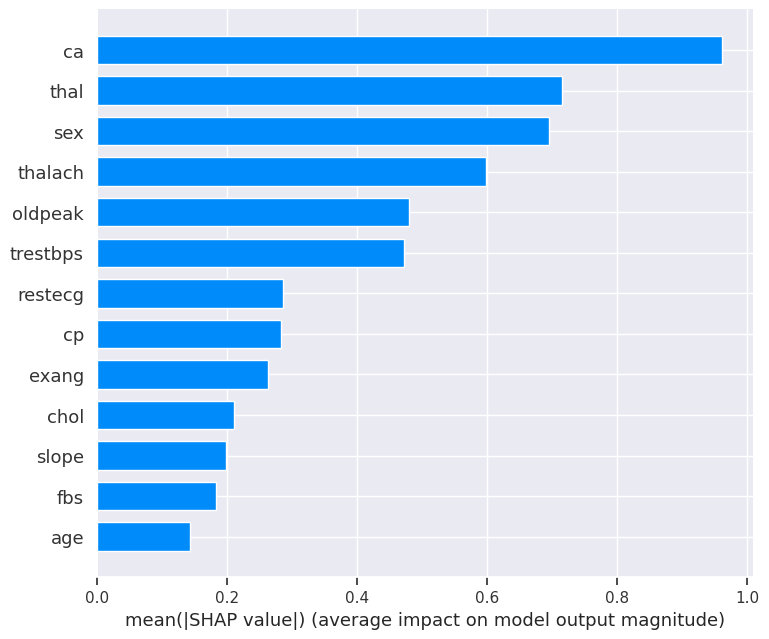

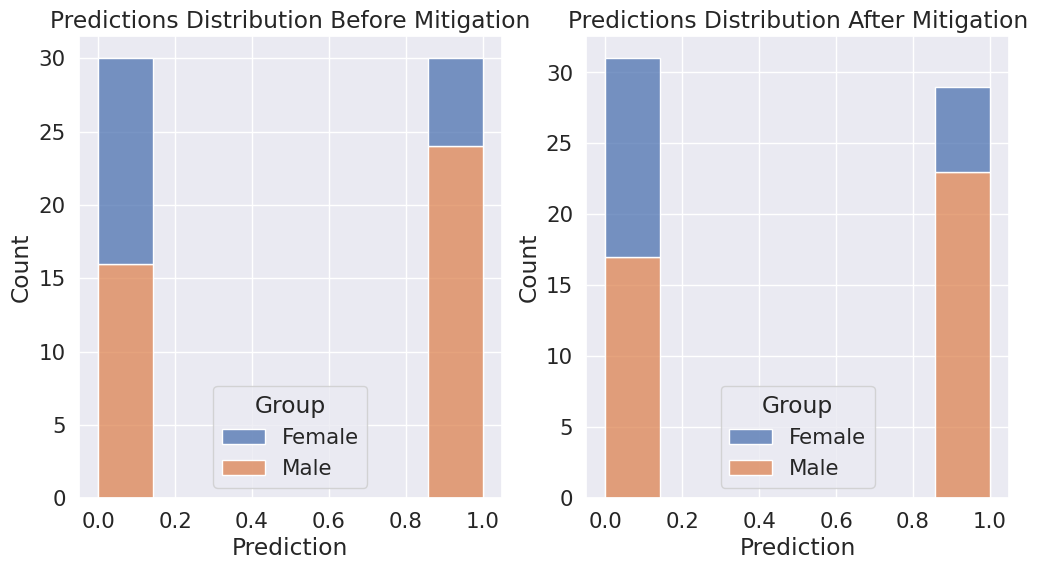

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Load your data
data = pd.read_csv('/content/heart_cleveland_upload.csv')

# Prepare features and target
X = data.drop('condition', axis=1)
y = data['condition']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Explain the model's decisions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the summary of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Simulate 'before mitigation' predictions
predictions_before = model.predict_proba(X_test)[:, 1] > 0.5

# Create a DataFrame for 'before mitigation' predictions
predictions_before_df = pd.DataFrame({
    'Prediction': predictions_before,
    'Group': np.where(X_test['sex'] == 1, 'Male', 'Female')
})

# Apply a simple bias mitigation by adjusting the decision threshold
threshold = 0.6
predictions_after = model.predict_proba(X_test)[:, 1] > threshold

# Create a DataFrame for 'after mitigation' predictions
predictions_after_df = pd.DataFrame({
    'Prediction': predictions_after,
    'Group': np.where(X_test['sex'] == 1, 'Male', 'Female')
})

# Create histograms to compare before and after mitigation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(data=predictions_before_df, x='Prediction', hue='Group', multiple='stack', ax=axes[0])
axes[0].set_title('Predictions Distribution Before Mitigation')
sns.histplot(data=predictions_after_df, x='Prediction', hue='Group', multiple='stack', ax=axes[1])
axes[1].set_title('Predictions Distribution After Mitigation')
plt.show()


ROC Curve and AUC: This graph helps assess the model's performance across different thresholds, providing a clear picture of trade-offs between sensitivity (true positive rate) and specificity (false positive rate).

SHAP Summary Plot: Offers detailed insights into which features have the most impact on the model's decisions.

Bar and Beeswarm Plots from SHAP: These provide additional visualizations for understanding the distribution and impact of SHAP values on model predictions.

Before and After Mitigation Comparisons: These histograms visually demonstrate how prediction distributions change when a bias mitigation strategy is applied.

Accuracy: 0.7333333333333333
[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



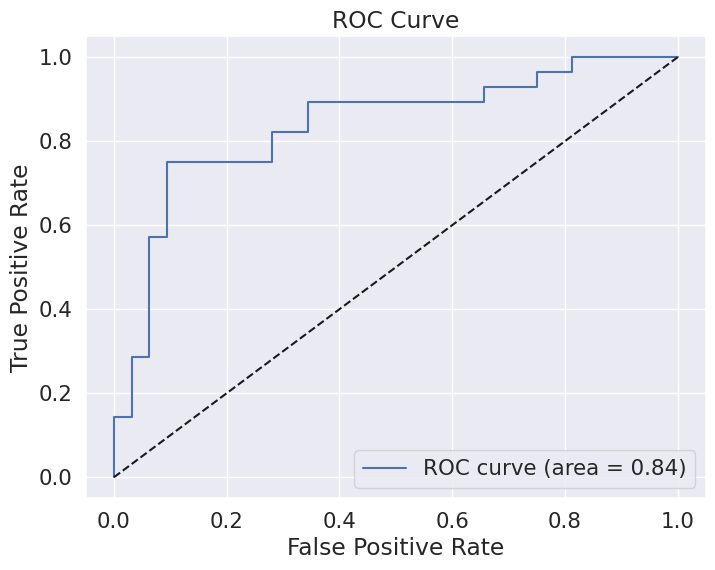

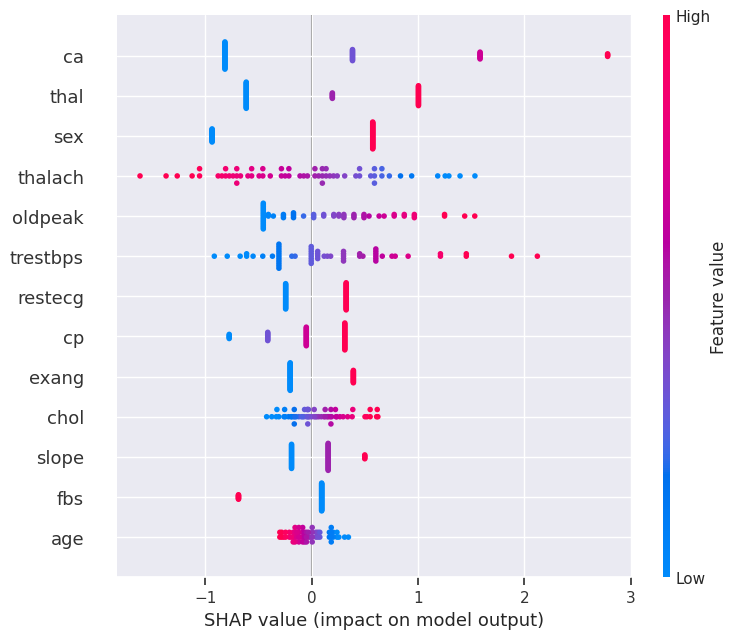

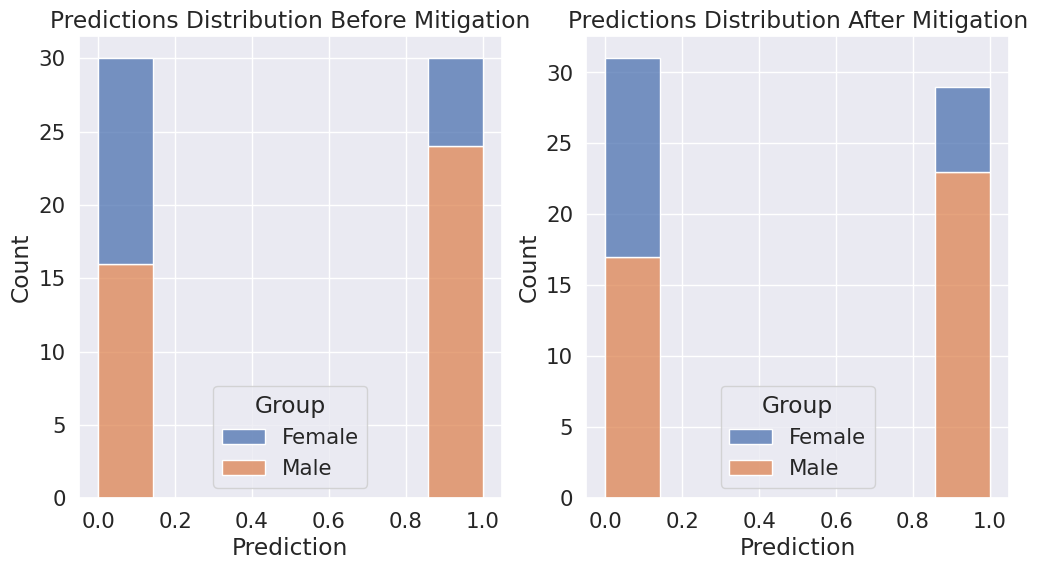

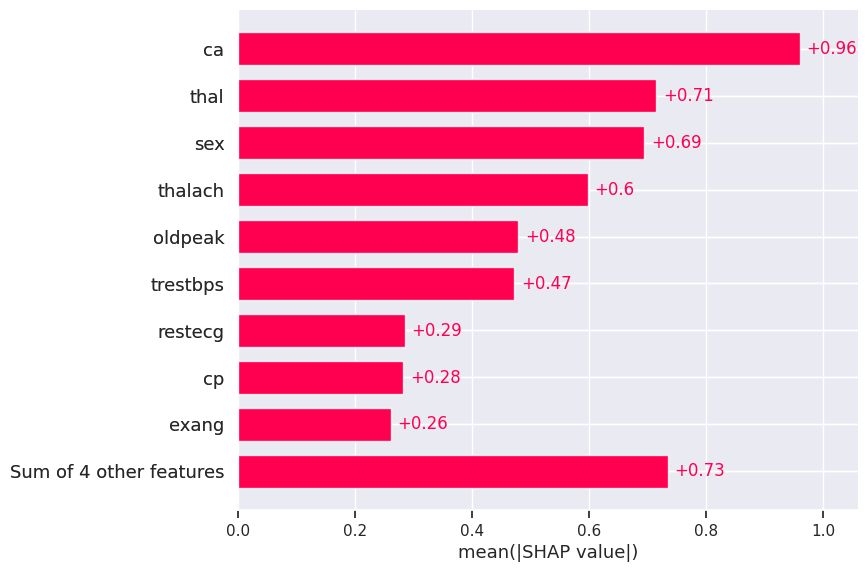

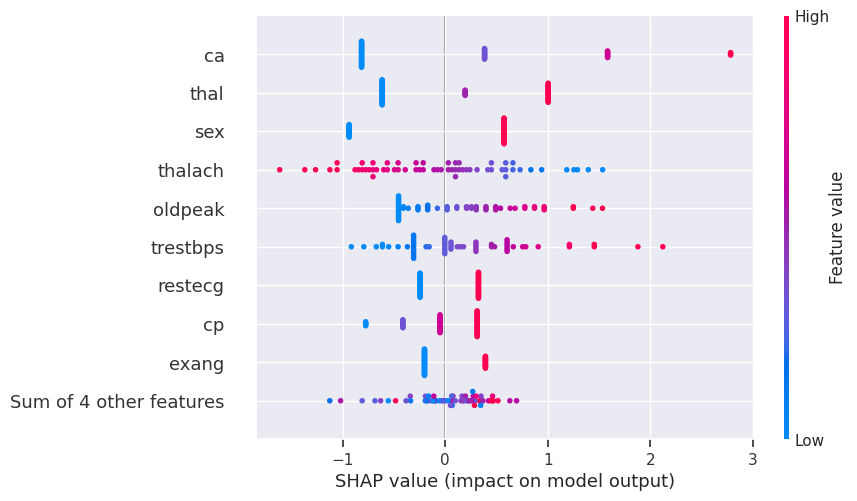

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import shap

# Load your data
data = pd.read_csv('/content/heart_cleveland_upload.csv')

# Prepare features and target
X = data.drop('condition', axis=1)
y = data['condition']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Explain the model's decisions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the summary of the SHAP values
shap.summary_plot(shap_values, X_test)

# Simulate 'before mitigation' predictions
predictions_before = model.predict_proba(X_test)[:, 1] > 0.5

# Create a DataFrame for 'before mitigation' predictions
predictions_before_df = pd.DataFrame({
    'Prediction': predictions_before,
    'Group': np.where(X_test['sex'] == 1, 'Male', 'Female')
})

# Apply a simple bias mitigation by adjusting the decision threshold
threshold = 0.6
predictions_after = model.predict_proba(X_test)[:, 1] > threshold

# Create a DataFrame for 'after mitigation' predictions
predictions_after_df = pd.DataFrame({
    'Prediction': predictions_after,
    'Group': np.where(X_test['sex'] == 1, 'Male', 'Female')
})

# Create histograms to compare before and after mitigation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(data=predictions_before_df, x='Prediction', hue='Group', multiple='stack', ax=axes[0])
axes[0].set_title('Predictions Distribution Before Mitigation')
sns.histplot(data=predictions_after_df, x='Prediction', hue='Group', multiple='stack', ax=axes[1])
axes[1].set_title('Predictions Distribution After Mitigation')
plt.show()

# Additional SHAP value plots for feature interaction and impact
shap.plots.bar(shap_values)  # Bar plot for feature importance
shap.plots.beeswarm(shap_values)  # Beeswarm plot for detailed feature impact visualization
